In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/MLPBert.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [ ]:
mean_value = df['score'].mean()

df['score'].fillna(mean_value, inplace=True)

# Display the DataFrame after imputation
print("DataFrame after imputation:")
df.head()

DataFrame after imputation:


<ipython-input-4-cbca18f313f8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(mean_value, inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
flag=False
for col in df.columns:
  if df[col].isnull().sum()>0:
    flag=True
    print(col)
    print(df[col].isnull().sum())
if flag==False:
  print("NO NULL VALUES")

NO NULL VALUES


In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))

# Count the number of outliers for each feature
outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outlier_counts)

Number of outliers for each feature:
       Outlier Count
0                 72
1                 77
2                 65
3                 75
4                 73
...              ...
764               38
765               48
766               38
767               64
score              1

[769 rows x 1 columns]


In [ ]:
sorted_df=outlier_counts.sort_values(by='Outlier Count')
sorted_df.tail()

,Outlier Count
103,105
658,108
520,109
111,127
25,129


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['103', '658', '520', '111', '25']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows_with_outliers = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows_with_outliers = len(unique_rows_with_outliers)
print("Number of Unique Rows with Outliers:", num_unique_rows_with_outliers)


Number of Unique Rows with Outliers: 247


In [ ]:
unique_rows_with_outliers.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
28,-1.037912,2.682020,0.903165,-1.816043,-0.248335,1.211192,-1.879963,-1.868595,1.154320,0.593042,...,-2.469375,0.427534,-1.499354,-2.104077,0.776572,-1.394947,-0.281871,-2.649937,1.154676,1.0
30,-1.024345,2.491009,1.186601,-1.412748,0.169934,1.006491,-1.936393,-1.490642,0.919850,-1.085242,...,-2.415054,-0.083309,-1.384263,-1.742578,0.303874,-1.992548,0.895076,-2.242639,0.631768,8.0
35,-0.974653,1.811035,1.049103,-0.866787,0.245786,0.357689,-1.320520,-1.543063,0.485118,0.015347,...,-2.169125,0.378180,-1.807216,-2.080824,0.744604,-1.955246,0.367177,-2.790861,1.897277,8.0
46,-2.433321,-0.444882,0.752662,1.570478,0.360589,2.073612,-1.728231,-2.502301,-0.759887,-1.432770,...,0.058461,1.410115,-2.519977,-0.558015,-0.555002,-2.664901,-1.439663,-0.972883,0.647158,4.0
47,-2.485149,-0.895207,0.337641,1.279975,-0.008297,2.520389,-1.760094,-2.866989,-0.441509,-1.979978,...,0.155173,1.050636,-2.646402,-0.073137,-0.529934,-2.768635,-2.230931,-1.315801,0.576990,7.0


In [ ]:
dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()


<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()
<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfnew=df.set_index(list(df.columns)).drop(unique_rows_with_outliers.set_index(list(unique_rows_with_outliers.columns)).index).reset_index()
<ipython-input-10-529e798a8b1c>:1: PerformanceWarning: DataFrame is highly fragmented.  This

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(dfnew))

# Count the number of outliers for each feature
new_outlier_counts = pd.DataFrame((z_scores > 2).sum(axis=0), columns=['Outlier Count'])

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(new_outlier_counts)

Number of outliers for each feature:
       Outlier Count
0                 64
1                 55
2                 52
3                 61
4                 57
...              ...
764               31
765               34
766               31
767               38
score              1

[769 rows x 1 columns]


In [ ]:
dfnew.shape

(927, 769)

In [ ]:
sorted_dfn=new_outlier_counts.sort_values(by='Outlier Count')
sorted_dfn.tail()

,Outlier Count
658,90
300,95
520,100
25,102
111,106


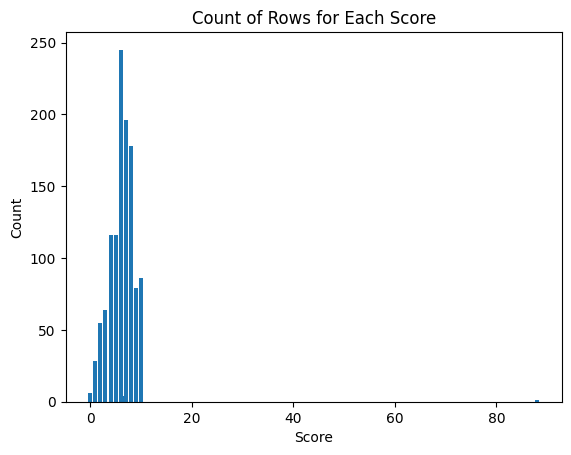

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = df['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()


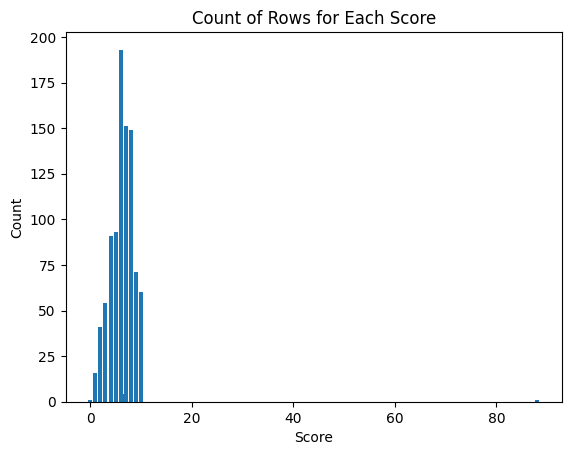

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each score
score_counts = dfnew['score'].value_counts()

# Plotting the bar plot
plt.bar(score_counts.index, score_counts.values)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Rows for Each Score')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = dfnew[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = dfnew[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)

Number of Unique Rows with Outliers: 881


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset with 5 features
# Replace this with your actual dataset

# Select the 5 features
selected_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                     '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                     '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                     '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
                     '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
                     '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
                     '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
                     '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
                     '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
                     '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
                     '101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
                     '111', '112', '113', '114', '115', '116', '117', '118', '119', '120',
                     '121', '122', '123', '124', '125', '126', '127', '128', '129', '130',
                     '131', '132', '133', '134', '135', '136', '137', '138', '139', '140',
                     '141', '142', '143', '144', '145', '146', '147', '148', '149', '150',
                     '151', '152', '153', '154', '155', '156', '157', '158', '159', '160',
                     '161', '162', '163', '164', '165', '166', '167', '168', '169', '170',
                     '171', '172', '173', '174', '175', '176', '177', '178', '179', '180',
                     '181', '182', '183', '184', '185', '186', '187', '188', '189', '190',
                     '191', '192', '193', '194', '195', '196', '197', '198', '199', '200',
                     '201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
                     '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
                     '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
                     '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
                     '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
                     '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
                     '261', '262', '263', '264', '265', '266', '267', '268', '269', '270',
                     '271', '272', '273', '274', '275', '276', '277', '278', '279', '280',
                     '281', '282', '283', '284', '285', '286', '287', '288', '289', '290',
                     '291', '292', '293', '294', '295', '296', '297', '298', '299', '300',
                     '301', '302', '303', '304', '305', '306', '307', '308', '309', '310',
                     '311', '312', '313', '314', '315', '316', '317', '318', '319', '320',
                     '321', '322', '323', '324', '325', '326', '327', '328', '329', '330',
                     '331', '332', '333', '334', '335', '336', '337', '338', '339', '340',
                     '341', '342', '343', '344', '345', '346', '347', '348', '349', '350',
                     '351', '352', '353', '354', '355', '356', '357', '358', '359', '360',
                     '361', '362', '363', '364', '365', '366', '367', '368', '369', '370',
                     '371', '372', '373', '374', '375', '376', '377', '378', '379', '380',
                     '381', '382', '383', '384', '385', '386', '387', '388', '389', '390',
                     '391', '392', '393', '394', '395', '396', '397', '398', '399', '400',
                     '401', '402', '403', '404', '405', '406', '407', '408', '409', '410',
                     '411', '412', '413', '414', '415', '416', '417', '418', '419', '420',
                     '421', '422', '423', '424', '425', '426', '427', '428', '429', '430',
                     '431', '432', '433', '434', '435', '436', '437', '438', '439', '440',
                     '441', '442', '443', '444', '445', '446', '447', '448', '449', '450',
                     '451', '452', '453', '454', '455', '456', '457', '458', '459', '460',
                     '461', '462', '463', '464', '465', '466', '467', '468', '469', '470',
                     '471', '472', '473', '474', '475', '476', '477', '478', '479', '480',
                     '481', '482', '483', '484', '485', '486', '487', '488', '489', '490',
                     '491', '492', '493', '494', '495', '496', '497', '498', '499', '500',
                     '501', '502', '503', '504', '505', '506', '507', '508', '509', '510',
                     '511', '512', '513', '514', '515', '516', '517', '518', '519', '520',
                     '521', '522', '523', '524', '525', '526', '527', '528', '529', '530',
                     '531', '532', '533', '534', '535', '536', '537', '538', '539', '540',
                     '541', '542', '543', '544', '545', '546', '547', '548', '549', '550',
                     '551', '552', '553', '554', '555', '556', '557', '558', '559', '560',
                     '561', '562', '563', '564', '565', '566', '567', '568', '569', '570',
                     '571', '572', '573', '574', '575', '576', '577', '578', '579', '580',
                     '581', '582', '583', '584', '585', '586', '587', '588', '589', '590',
                     '591', '592', '593', '594', '595', '596', '597', '598', '599', '600',
                     '601', '602', '603', '604', '605', '606', '607', '608', '609', '610',
                     '611', '612', '613', '614', '615', '616', '617', '618', '619', '620',
                     '621', '622', '623', '624', '625', '626', '627', '628', '629', '630',
                     '631', '632', '633', '634', '635', '636', '637', '638', '639', '640',
                     '641', '642', '643', '644', '645', '646', '647', '648', '649', '650',
                     '651', '652', '653', '654', '655', '656', '657', '658', '659', '660',
                     '661', '662', '663', '664', '665', '666', '667', '668', '669', '670',
                     '671', '672', '673', '674', '675', '676', '677', '678', '679', '680',
                     '681', '682', '683', '684', '685', '686', '687', '688', '689', '690',
                     '691', '692', '693', '694', '695', '696', '697', '698', '699', '700',
                     '701', '702', '703', '704', '705', '706', '707', '708', '709', '710',
                     '711', '712', '713', '714', '715', '716', '717', '718', '719', '720',
                     '721', '722', '723', '724', '725', '726', '727', '728', '729', '730',
                     '731', '732', '733', '734', '735', '736', '737', '738', '739', '740',
                     '741', '742', '743', '744', '745', '746', '747', '748', '749', '750',
                     '751', '752', '753', '754', '755', '756', '757', '758', '759', '760',
                     '761', '762', '763', '764', '765', '766', '767']
data = df[selected_features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(data_scaled)

# Identify unique rows with outliers
unique_rows = df[outlier_labels == -1].drop_duplicates()

# Display the number of unique rows with outliers
num_unique_rows = len(unique_rows)
print("Number of Unique Rows with Outliers:", num_unique_rows)

Number of Unique Rows with Outliers: 1128


In [ ]:
import pandas as pd
from scipy.stats import zscore


# Calculate Z-scores for the target column
z_scores = zscore(df['score'])

# Define a threshold (e.g., 3) beyond which a data point is considered an outlier
threshold = 3

# Identify and remove rows with target values considered outliers
outliers_mask = abs(z_scores) > threshold
ndf = df[~outliers_mask]

# Display the DataFrame after removing outliers
print("DataFrame after removing outliers:")
ndf.head()


DataFrame after removing outliers:


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
ndf.shape

(1175, 769)

In [ ]:
ndf = ndf[ndf['score'] <= 10]


In [ ]:
ndf = ndf[ndf['score'] >= 0]

In [ ]:
ndf['score'] = ndf['score'].round().astype(int)


In [ ]:
ndf.shape

(1175, 769)

FEATURE SELECTION USING ELASTIC NET AND LASSO REGRESSION

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
X=ndf.drop('score', axis=1)
y=ndf['score']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Elastic Net model
alpha = 0.5  # Parameter for the L1 regularization term (LASSO)
l1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization (Elastic Net)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Train the Elastic Net model
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")

# Display the selected coefficients (non-zero coefficients indicate selected features)
print("Selected Coefficients:")
res=elastic_net.coef_
print(res)

Mean Squared Error: 4.18824
Selected Coefficients:
[ 0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.02647131  0.          0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.05710312
  0.         -0.          0.          0.         -0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.          0.         -0.   

In [ ]:
selected = [index for index, value in enumerate(res) if value != 0]

print("Indexes of non-zero numbers:", selected)

Indexes of non-zero numbers: [33, 71, 113, 143, 169, 177, 239, 241, 368, 438, 464, 508, 530, 577, 652, 684, 702]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.1  # Regularization strength (adjustable parameter)
lasso_model = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model.coef_)

Learned Coefficients:
[ 0.         -0.         -0.          0.          0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.17181207 -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.22742223
  0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.20496613
 -0.         -0.          0.          0.         -0.          0.
  0.          0.          0.         -0.          0.          0.
  0.          0.         -0.         -0.          0.

In [ ]:
lasso_res = [index for index, value in enumerate(lasso_model.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res)

Indexes of non-zero numbers: [33, 53, 71, 113, 143, 151, 163, 169, 177, 199, 206, 241, 264, 313, 323, 326, 344, 372, 373, 376, 438, 464, 476, 512, 603, 611, 652, 684, 702, 706]


In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+00, tolerance: 3.835e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.600e+00, tolerance: 3.791e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+00, tolerance: 3.704e

0.012812873833601413
0.2890961060242313


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+00, tolerance: 4.743e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:

#applying lasso again with hyperparam tuning
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# Initialize the LASSO model
alpha = 0.0170216866235795 # Regularization strength (adjustable parameter)
lasso_model_hp = Lasso(alpha=alpha, random_state=42)

# Train the LASSO model
lasso_model_hp.fit(X_train, y_train)

# Display the learned coefficients
print("Learned Coefficients:")
print(lasso_model_hp.coef_)
lasso_res_hp = [index for index, value in enumerate(lasso_model_hp.coef_) if value != 0]

print("Indexes of non-zero numbers:", lasso_res_hp)

Learned Coefficients:
[ 0.         -0.         -0.1773495  -0.         -0.         -0.
 -0.          0.00894628 -0.         -0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.11343458  0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.03202842 -0.08729536 -0.14960997 -0.          0.
  0.          0.04592052  0.11197647  0.06324652  0.          0.
  0.          0.          0.05729021 -0.          0.          0.
 -0.          0.          0.         -0.08971986 -0.         -0.5066643
  0.         -0.          0.         -0.         -0.05433541  0.09364949
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.15284835 -0.23995954
 -0.         -0.          0.         -0.          0.         -0.
  0.27564747  0.         -0.         -0.          0.         -0.
 -0.          0.          0.         -0.     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+00, tolerance: 4.743e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
ndf.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
764,float64
765,float64
766,float64
767,float64


In [ ]:
unique_values = ndf['score'].unique()

#print(f"Unique values of the '{feature_name}' feature:")
print(unique_values)

[10  8  7  5  6  4  9  1  2  3  0]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named original_df

# List of features you want to select
selected_features = ['2', '7', '18', '31', '32', '33', '37', '38', '39', '44', '51', '53', '58', '59', '70', '71',
                     '78', '88', '89', '100', '110', '113', '117', '124', '136', '137', '141', '147', '151', '163',
                     '165', '169', '184', '189', '194', '195', '199', '201', '208', '209', '211', '215', '217', '219',
                     '225', '236', '239', '240', '264', '273', '297', '301', '313', '323', '326', '346', '366', '375',
                     '382', '389', '399', '402', '403', '407', '408', '418', '425', '429', '430', '432', '433', '434',
                     '447', '454', '464', '473', '478', '484', '486', '502', '503', '505', '506', '510', '513', '522',
                     '523', '530', '536', '542', '547', '551', '554', '557', '559', '563', '565', '569', '575', '579',
                     '580', '587', '593', '598', '603', '607', '609', '623', '632', '635', '637', '638', '639', '640',
                     '644', '645', '648', '653', '654', '655', '656', '661', '664', '680', '684', '687', '688', '691',
                     '695', '697', '701', '703', '704', '706', '710', '713', '716', '725', '727', '728', '734', '747', '749', '750', '754', '756', '763']

# Create a new DataFrame with selected features
new_df = ndf[selected_features].copy()

# Display the new DataFrame
print(new_df)


             2         7        18        31        32        33        37  \
0     1.030452 -1.657276  0.413562  1.628438  1.508062 -2.271251  0.290558   
1     1.117223 -1.812830  0.284334  1.460007  1.621506 -2.344067  0.294730   
2     0.994477 -1.669257  0.405725  1.632208  1.522269 -2.303496  0.281383   
3     1.027737 -1.789147  0.325666  1.597984  1.515191 -2.279244  0.270924   
4     1.050743 -1.603735  0.448165  1.580377  1.524122 -2.209410  0.341813   
...        ...       ...       ...       ...       ...       ...       ...   
1171 -0.794640 -0.204680 -0.039235 -0.282675  1.198532 -1.707034 -0.948506   
1172 -2.231147  0.092465 -0.279312 -0.952901  0.383562 -1.126312 -0.754892   
1173  0.067668 -0.827843  1.133334  1.033356 -0.528824 -3.717525  0.302206   
1174 -2.486930  0.260370 -0.260491 -0.887893  0.242270 -0.952728 -0.801982   
1175 -2.228937  0.323767  1.068386  0.179288 -0.537436 -1.753453  0.663032   

            38        39        44  ...       725       727    

In [ ]:
ndf = ndf.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)
ndf['index']=range(len(ndf))
ndf.set_index('index', inplace=True)
new_df['index']=range(len(new_df))
new_df.set_index('index', inplace=True)

In [ ]:
ndf.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
index,,,,,,,,,,,,,,,,,,,,,
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6


**KMEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# kmeans model for subset dataset

X = new_df
y = ndf['score']

model_kmeans = KMeans(n_clusters=11, random_state=42)
kmeans_model = model_kmeans.fit(X)
kmeans_model.labels_

array([8, 8, 8, ..., 4, 6, 6], dtype=int32)

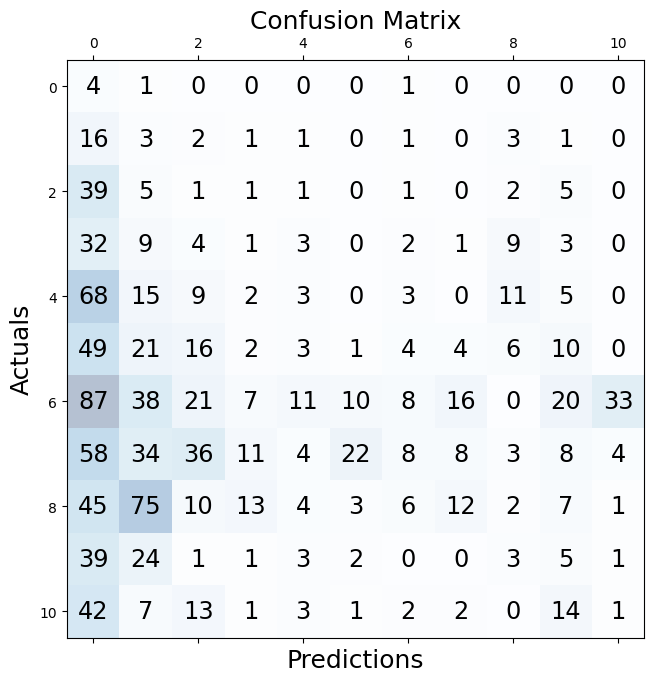

Silhouette Score: 0.2869431356037644
calinski_harabasz Score: 95.90786717403843
davies_bouldin Score: 1.3554279753089948
ari Score: 0.0012712765855229843
nmi Score: 0.08321950657882494
fm_index Score: 0.17298964731130612


In [ ]:
#applying kmeans to entire dataset
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix
Xt=ndf.drop('score', axis=1)
modelt = KMeans(n_clusters=11, random_state=42)
kmeans_modelt = modelt.fit(Xt)
clusters=modelt.fit_predict(Xt)
klabels=kmeans_modelt.labels_
conf_matrix=confusion_matrix(y, klabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, klabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, klabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, klabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], klabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], klabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], klabels)
print(f"fm_index Score: {fm_index}")


CLUSTER DISTRIBUTION ACROSS DIFFERENT CLASSES

In [ ]:
data_with_clusters = pd.DataFrame(data=Xt, columns=Xt.columns)
data_with_clusters["Cluster"] = clusters
cluster_distribution = pd.crosstab(data_with_clusters["Cluster"], y)

print("\nCluster Distribution Across Target Variable:")
print(cluster_distribution)


Cluster Distribution Across Target Variable:
score    0   1   2   3   4   5   6   7   8   9   10
Cluster                                            
0         0   3  10   6  14   7  22  13   2   1   6
1         0   0   0   0   1   3  15   8  12   0   0
2         0   1   1   3   5  10   8   8   3   0   1
3         0   0   0   1   0   4  16   8  12   0   2
4         0   0   0   0   0   1  10  22   3   2   1
5         1   1   1   2   3   4   8   8   6   0   2
6         0   1   1   1   2   2   7  11  13   1   1
7         0   3   2   9  11   6   0   3   2   3   0
8         0   2   4   3   4   5   5   4   4   5   4
9         2   2   4   5   5   6   4   4   3   2   2
10        0   1   1   3   3   3  11   4   4   3   3
11        1   0   0   4   7   9   6   3   2   1   1
12        0   0   0   0   1   0   1   5  24   7   1
13        0   0   0   1   0   1   5  24   8   0   0
14        0   3   4   5   5   4   5   6   3   4   1
15        0   0   0   0   0   4   7   7   2   3   1
16        0   4  1

In [ ]:
cluster_counts = pd.Series(clusters).value_counts()
print(cluster_counts)

0     84
24    58
20    45
3     43
28    41
6     40
14    40
8     40
29    40
18    40
17    40
2     40
1     39
9     39
16    39
19    39
13    39
4     39
12    39
7     39
5     36
10    36
25    36
23    36
21    34
11    34
22    30
15    24
30    20
26    16
27    10
Name: count, dtype: int64


In [ ]:
class_counts = pd.Series(y).value_counts()

print("Number of datapoints in each class:")
print(class_counts)

Number of datapoints in each class:
score
6     251
7     196
8     178
5     116
4     116
10     86
9      79
3      64
2      55
1      28
0       6
Name: count, dtype: int64


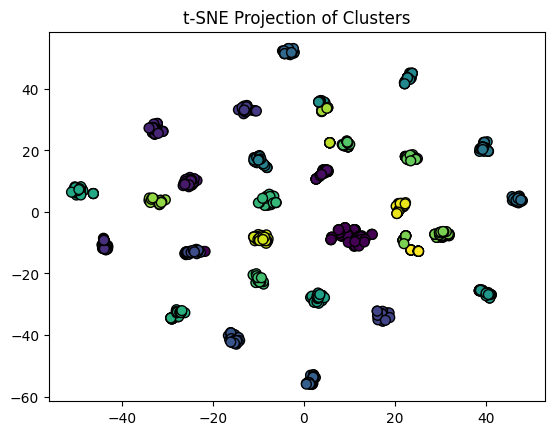

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=klabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()


Silhouette Score: 0.43839077609987503


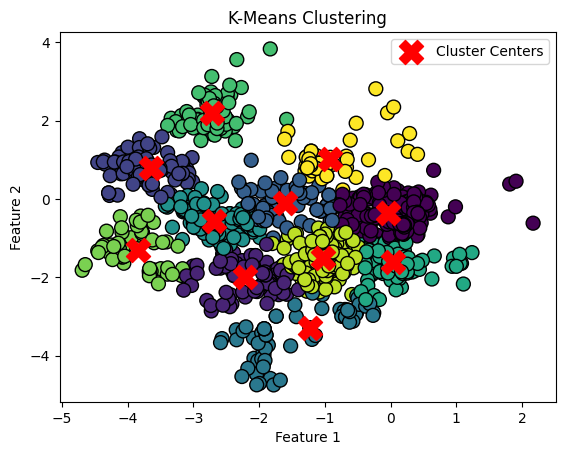

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract features (assuming you have two features for simplicity)
features = new_df[['53', '71']].values

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters
plt.scatter(features[:, 0], features[:, 1], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()

AGGLOMERATIVE CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=11, linkage='ward')
hierar_sub=hierarchical.fit_predict(X)
hierarchical.labels_

array([10, 10, 10, ...,  1,  0,  0])

In [ ]:
y_hierarchical= np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(int)
y_hierarchical

array([10,  8,  7, ...,  2,  8, 10])

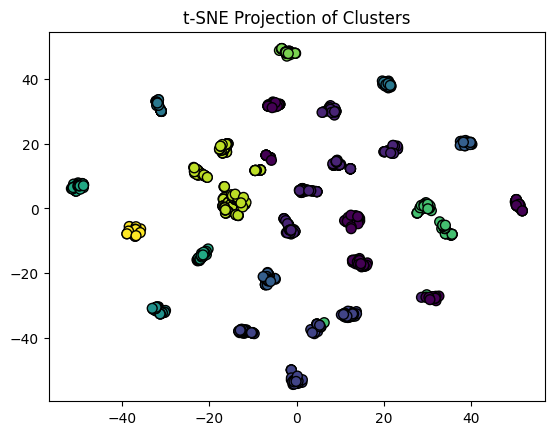

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_h = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_h[:, 0], X_tsne_h[:, 1], c=hierarchical.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

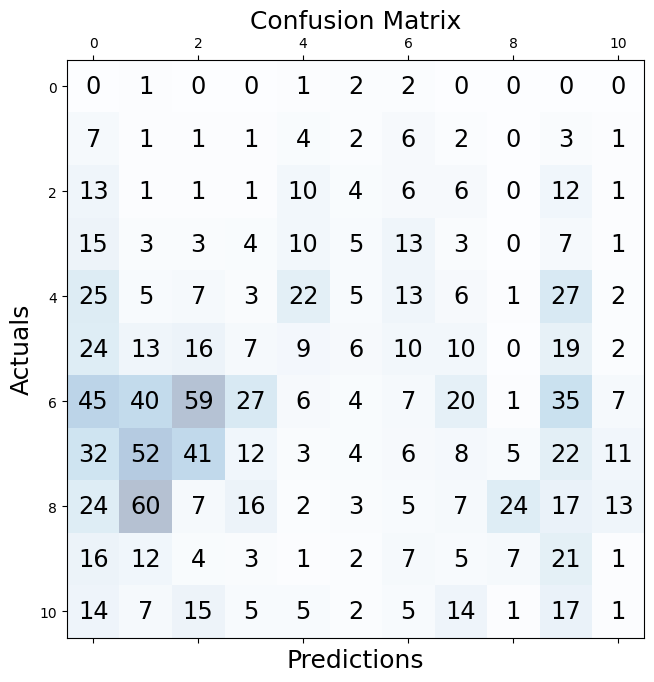

ari Score: 0.03605664362106147
nmi Score: 0.08361819885422687
fm_index Score: 0.15786708521234447
Silhouette Score: 0.2772874649466415
calinski_harabasz Score: 111.9557008950601
davies_bouldin Score: 1.599060584773043


In [ ]:
#hierarchical for subset dataset
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, hierarchical.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hierarchical.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hierarchical.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hierarchical.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, hierarchical.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, hierarchical.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, hierarchical.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


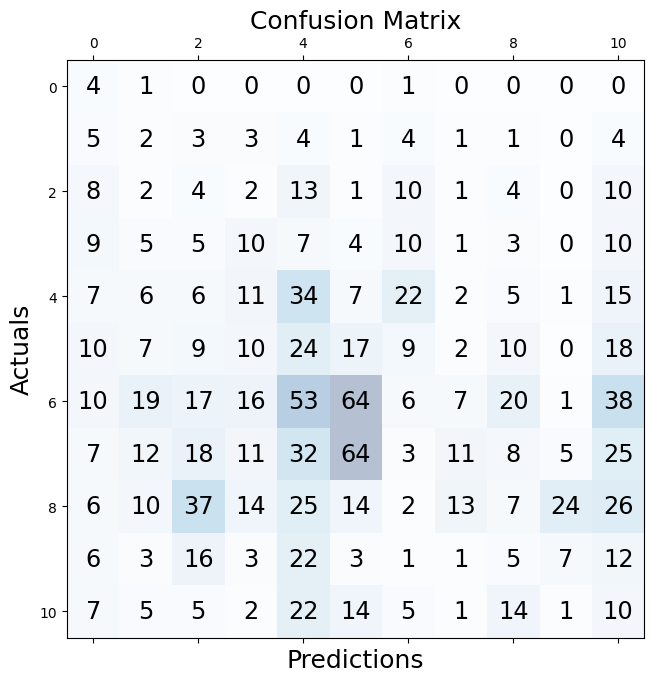

Silhouette Score: 0.2876551916235689
calinski_harabasz Score: 112.97657917480245
davies_bouldin Score: 1.5586307811049316
ari Score: 0.03138946220785145
nmi Score: 0.07154571545883338
fm_index Score: 0.1527134860184909


In [ ]:
#applying hierarchical clustering to entire dataset

Xt=ndf.drop('score', axis=1)
#modelt = KMeans(n_clusters=11, random_state=42)
hierarchicalt = hierarchical.fit_predict(Xt)
hlabels=hierarchical.labels_
conf_matrix=confusion_matrix(y, hlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, hlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, hlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, hlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], hlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], hlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], hlabels)
print(f"fm_index Score: {fm_index}")


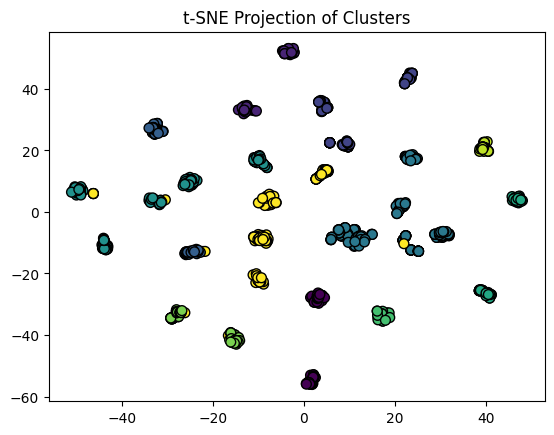

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()


DBSCAN CLUSTERING

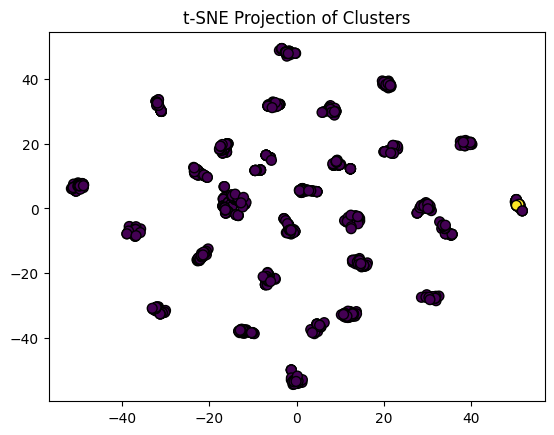

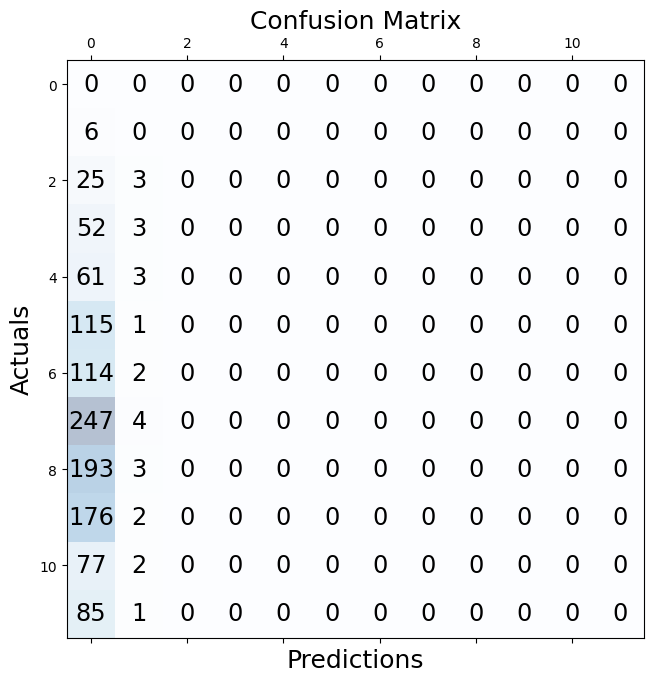

ari Score: 0.002410205292320959
nmi Score: 0.004677529751614449
fm_index Score: 0.357186281186903
Silhouette Score: 0.021459656760869267
calinski_harabasz Score: 23.476177063142064
davies_bouldin Score: 0.9950478115873445


In [ ]:
#DBSCAN for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
dlabels = db.labels_
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_d = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_d[:, 0], X_tsne_h[:, 1], c=db.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, db.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], db.labels_)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], db.labels_)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], db.labels_)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, db.labels_)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, db.labels_)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, db.labels_)
print(f"davies_bouldin Score: {davies_bouldin}")


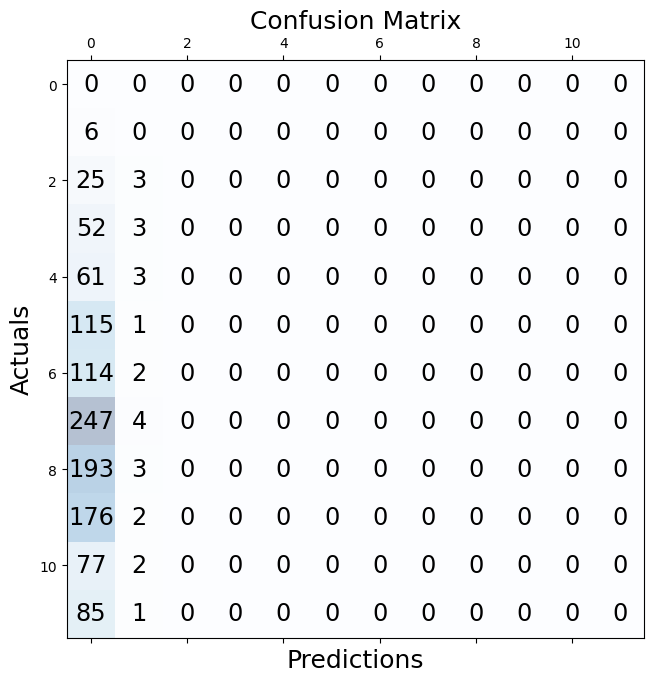

Silhouette Score: 0.06882523204588104
calinski_harabasz Score: 28.503650019592932
davies_bouldin Score: 0.9023144169830504
ari Score: 0.002410205292320959
nmi Score: 0.004677529751614449
fm_index Score: 0.357186281186903


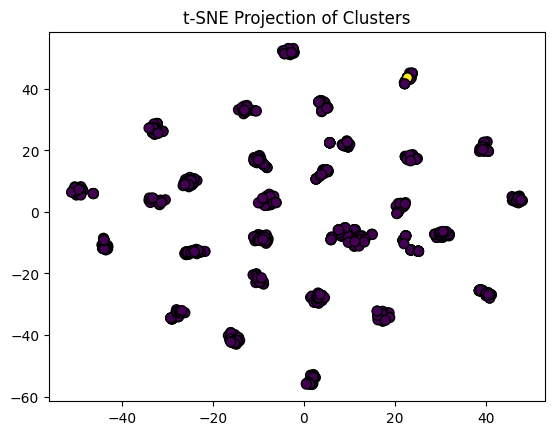

In [ ]:
#applying DBSCAN to entire dataset

Xt=ndf.drop('score', axis=1)
dbt = DBSCAN(eps=0.3, min_samples=10).fit(Xt)
dlabelst = dbt.labels_
conf_matrix=confusion_matrix(y, dlabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, dlabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, dlabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, dlabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], dlabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], dlabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], dlabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dlabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



GAUSSIAN MIXTURE MODEL

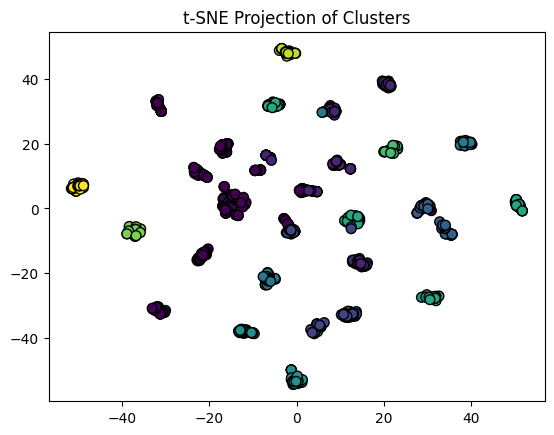

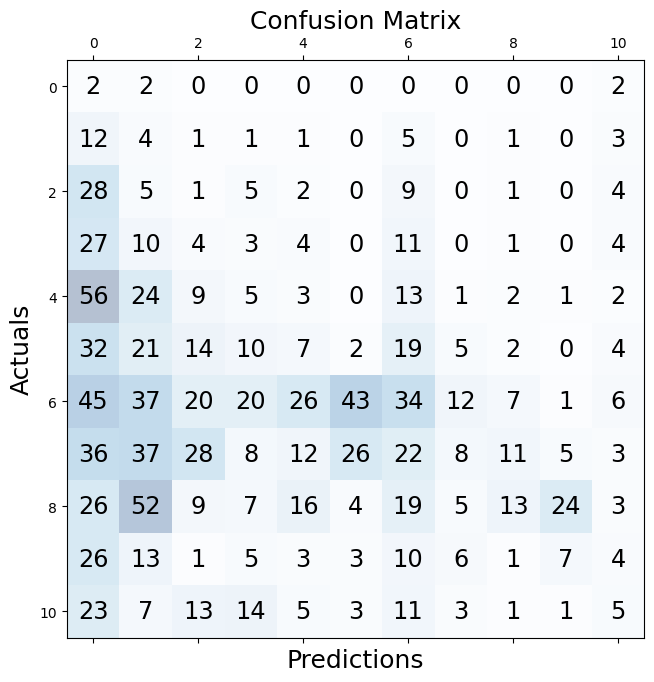

ari Score: 0.007857359589302572
nmi Score: 0.07142622567567117
fm_index Score: 0.144611021772584
Silhouette Score: 0.2729263596583079
calinski_harabasz Score: 104.24251259741949
davies_bouldin Score: 1.6531941225948505


In [ ]:
#Gaussian Mixture Model (GMM) for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 11, random_state=42)
glabels=gmm.fit_predict(X)
#glabels = gmm.labels_
#glabels = gmm.get_params()['labels_']
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne_g = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne_g[:, 0], X_tsne_g[:, 1], c=glabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, glabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'],glabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, glabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, glabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, glabels)
print(f"davies_bouldin Score: {davies_bouldin}")


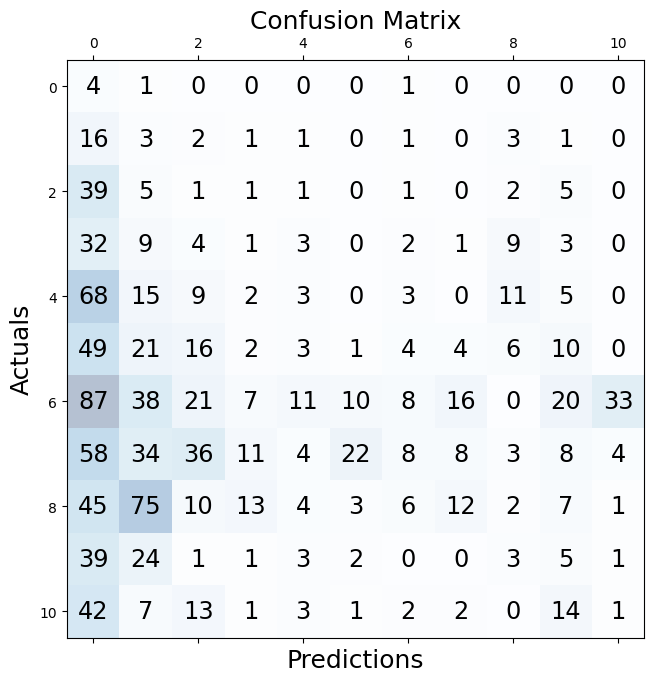

Silhouette Score: 0.2869431356037644
calinski_harabasz Score: 95.90786717403843
davies_bouldin Score: 1.3554279753089948
ari Score: 0.0012712765855229843
nmi Score: 0.08321950657882494
fm_index Score: 0.17298964731130612


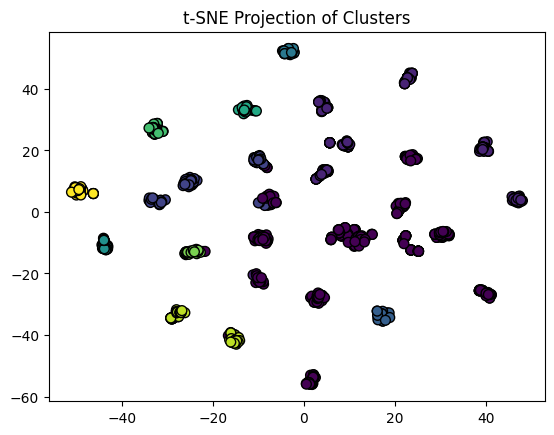

In [ ]:
#applying Gaussian Mixture Model (GMM) to entire dataset

Xt=ndf.drop('score', axis=1)
glabelst=gmm.fit_predict(Xt)
conf_matrix=confusion_matrix(y, glabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, glabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, glabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, glabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], glabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], glabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], glabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=glabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



SPECTRAL CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


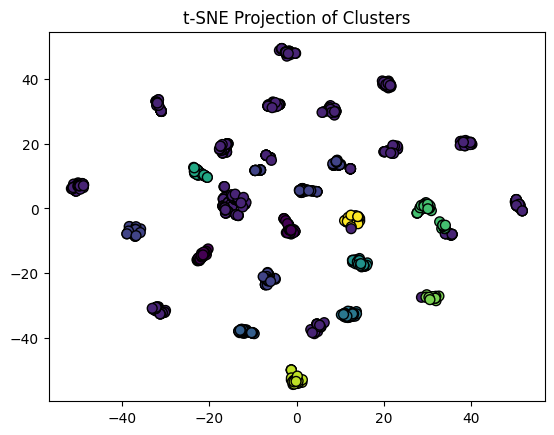

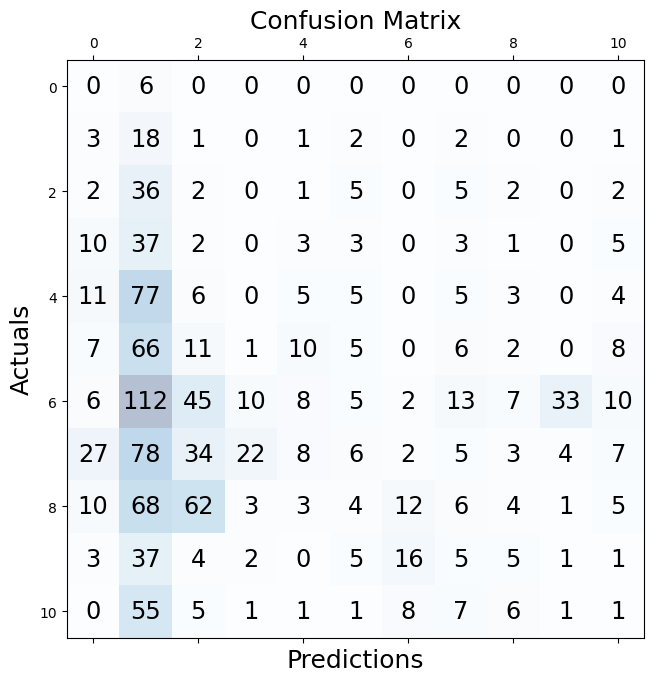

ari Score: -0.0011418270147342893
nmi Score: 0.08994585438705874
fm_index Score: 0.1930073173076201
Silhouette Score: 0.09483953077533082
calinski_harabasz Score: 48.50043343464566
davies_bouldin Score: 1.9328193073956583


In [ ]:
#spectral clustering for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', random_state=0)
slabels=sc.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, slabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, slabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, slabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, slabels)
print(f"davies_bouldin Score: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


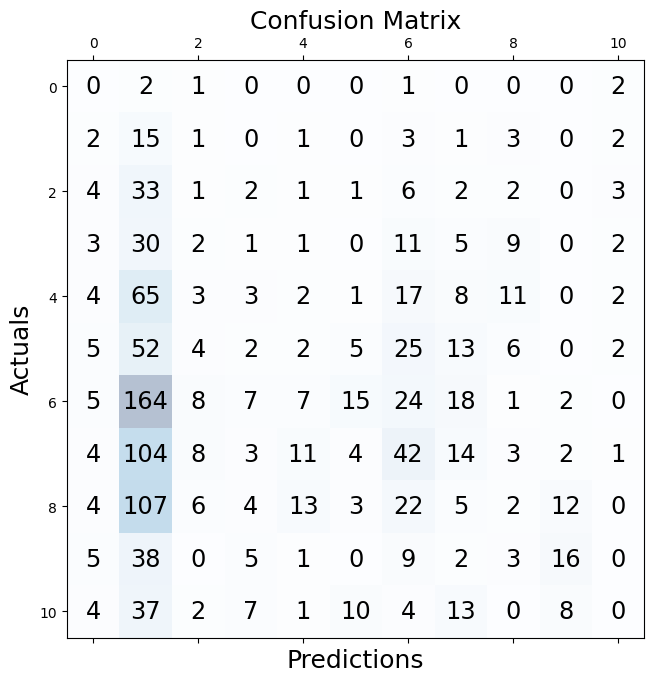

Silhouette Score: 0.09104370496005004
calinski_harabasz Score: 47.98483818827796
davies_bouldin Score: 1.7837988725100047
ari Score: 0.025382963647091018
nmi Score: 0.06673133605877711
fm_index Score: 0.2320933906207432


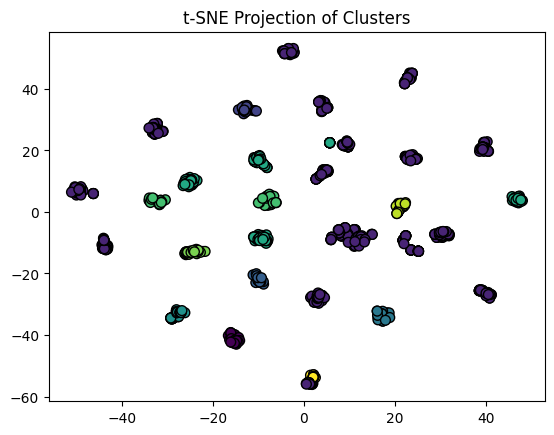

In [ ]:
#applying spectral clustering to entire dataset

Xt=ndf.drop('score', axis=1)
slabelst=sc.fit_predict(Xt)
conf_matrix=confusion_matrix(y, slabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, slabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, slabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, slabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], slabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], slabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], slabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=slabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



BIRCH CLUSTERING

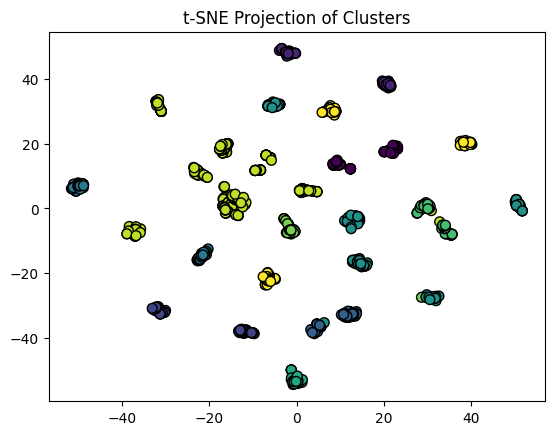

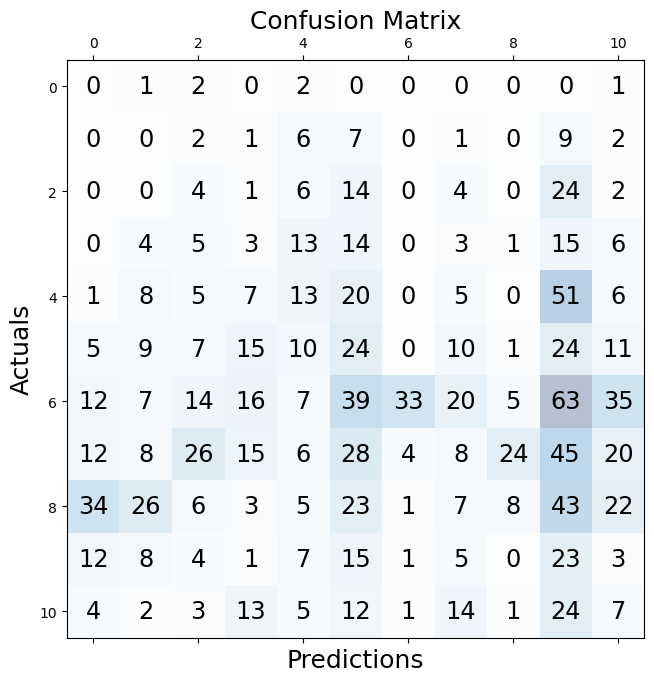

ari Score: 0.010272367957840492
nmi Score: 0.07775631872352563
fm_index Score: 0.14397832333348462
Silhouette Score: 0.2783349474601684
calinski_harabasz Score: 106.30740769494348
davies_bouldin Score: 1.5285238164298256


In [ ]:
#BIRCH for subset dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import Birch
bmodel = Birch(branching_factor = 50, n_clusters = 11, threshold = 1.5)

# Fit the data (Training)
blabels=bmodel.fit_predict(X)
# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, blabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, blabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, blabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, blabels)
print(f"davies_bouldin Score: {davies_bouldin}")


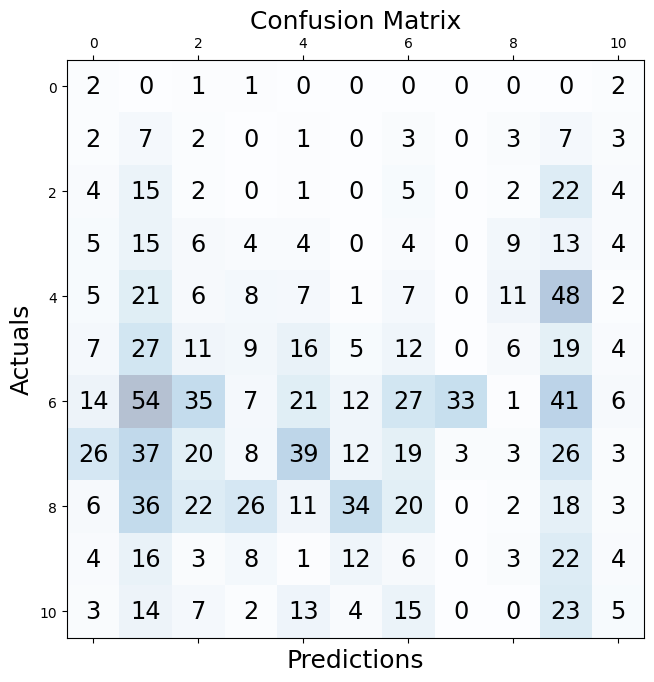

Silhouette Score: 0.2710709213272746
calinski_harabasz Score: 101.96980212458631
davies_bouldin Score: 1.6122137951266373
ari Score: 0.016838639781371973
nmi Score: 0.0801549914043716
fm_index Score: 0.14418938929521838


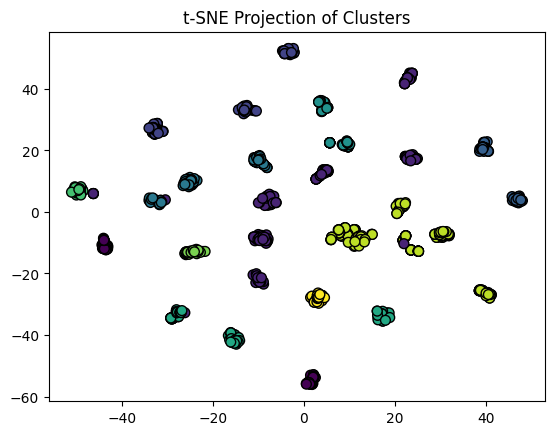

In [ ]:
#applying BIRCH to entire dataset

Xt=ndf.drop('score', axis=1)

blabelst = bmodel.fit_predict(Xt)
conf_matrix=confusion_matrix(y, blabelst)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, blabelst)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, blabelst)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, blabelst)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], blabelst)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], blabelst)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], blabelst)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=blabelst, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()



KMEDOIDS CLUSTERING

In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


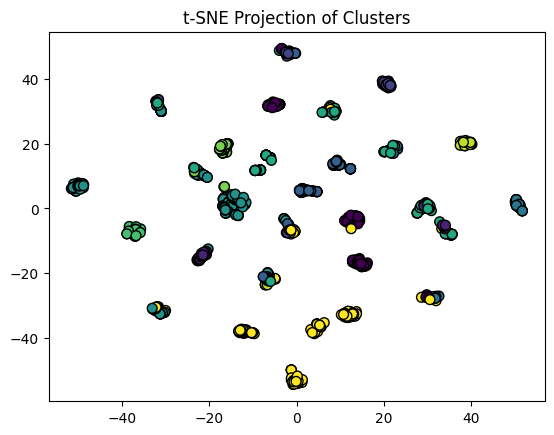

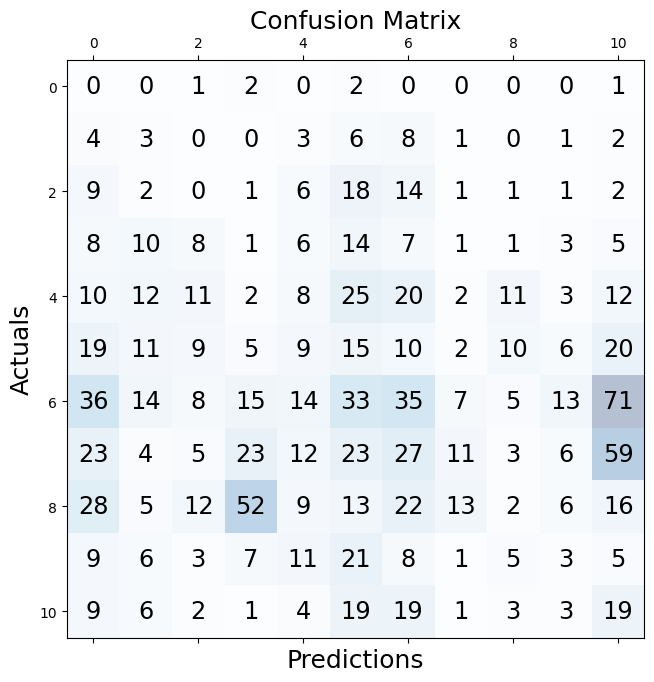

ari Score: 0.02991261800694706
nmi Score: 0.06371374420289162
fm_index Score: 0.1513264232871718
Silhouette Score: 0.17237794455264308
calinski_harabasz Score: 76.90372030741311
davies_bouldin Score: 1.974173057220636


In [ ]:
#kmedoids for subset dataset
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
kmedoids = KMedoids(n_clusters=11).fit(X)
clabels=kmedoids.labels_

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, clabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], clabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], clabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], clabels)
print(f"fm_index Score: {fm_index}")
silhouette_coefficient = silhouette_score(X, clabels)
print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, clabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, clabels)
print(f"davies_bouldin Score: {davies_bouldin}")


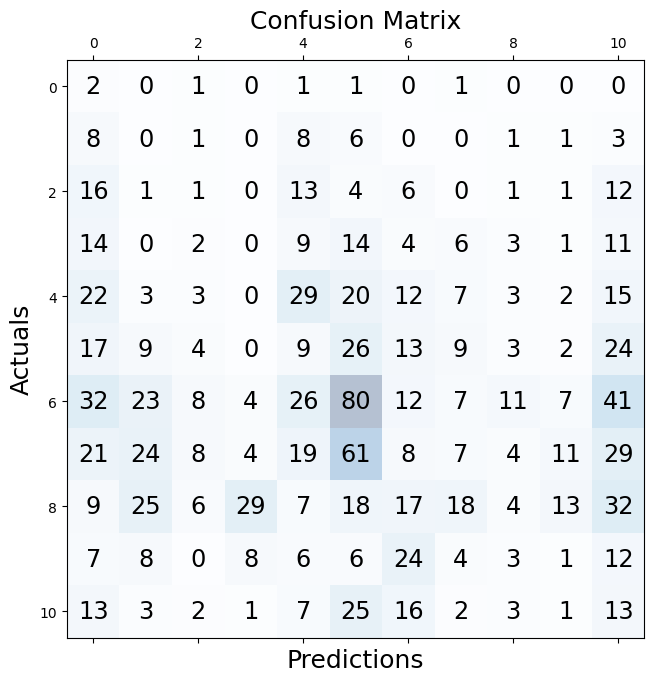

Silhouette Score: 0.1982009206209411
calinski_harabasz Score: 74.4625331851027
davies_bouldin Score: 1.9444380493598032
ari Score: 0.0260021752724222
nmi Score: 0.07005550065873516
fm_index Score: 0.1530575502992983


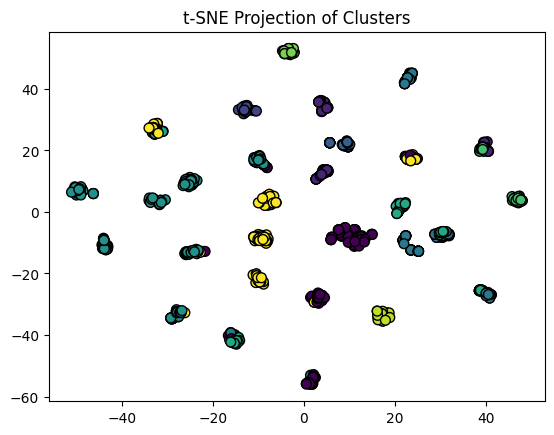

In [ ]:
#applying kmedoids to entire dataset

Xt=ndf.drop('score', axis=1)

kmedoids = KMedoids(n_clusters=11).fit(Xt)
kmlabels=kmedoids.labels_

conf_matrix=confusion_matrix(y, kmlabels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
silhouette_coefficient = silhouette_score(Xt, kmlabels)

print(f"Silhouette Score: {silhouette_coefficient}")
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(Xt, kmlabels)
print(f"calinski_harabasz Score: {calinski_harabasz}")
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(Xt, kmlabels)
print(f"davies_bouldin Score: {davies_bouldin}")

from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(ndf['score'], kmlabels)
print(f"ari Score: {ari}")
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(ndf['score'], kmlabels)
print(f"nmi Score: {nmi}")

from sklearn.metrics import fowlkes_mallows_score
fm_index = fowlkes_mallows_score(ndf['score'], kmlabels)
print(f"fm_index Score: {fm_index}")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your 30-dimensional data and 'predicted_labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Xt)

# Plot the clusters in the reduced 2D space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmlabels, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Projection of Clusters')
plt.show()

